In [143]:
library('tidyverse')
library('scales')
options(repr.plot.height = 3, repr.plot.width = 8, repr.plot.res = 300)

The following dataset was captured from the Hooktheory database and contains information about songs containing 4 chords in either the verse, chorus, or instrumental sections of the songs. The songs were then run through the Spotify API to gather further information for those who were found on Spotify.

Below, I will read in the data using a read_csv function:

In [63]:
chord_p = read_csv('https://raw.githubusercontent.com/jhamer90811/chord_progression_assistant/master/four_chord_songs.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  cp = col_number(),
  artist = col_character(),
  song = col_character(),
  section = col_character(),
  spotify_ID = col_character(),
  danceability = col_double(),
  energy = col_double(),
  key = col_double(),
  loudness = col_double(),
  mode = col_double(),
  speechiness = col_double(),
  acousticness = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  valence = col_double(),
  tempo = col_double(),
  duration_ms = col_double(),
  time_signature = col_double()
)




# A tibble: 16,549 × 18
      cp artist   song    section spotify_ID  danceability energy   key loudness
   <dbl> <chr>    <chr>   <chr>   <chr>              <dbl>  <dbl> <dbl>    <dbl>
 1  1564 3 doors… be lik… intro   3PbHle8KhJ…        0.487  0.702     7    -6.04
 2  1564 3 doors… be lik… verse   3PbHle8KhJ…        0.487  0.702     7    -6.04
 3  1564 adele    someon… chorus  4kflIGfjdZ…        0.559  0.33      9    -8.25
 4  1564 avril l… girlfr… chorus  5HbCnVLXRy…        0.56   0.959     7    -2.43
 5  1564 bon jovi living… chorus  NA                NA     NA        NA    NA   
 6  1564 bruno m… grenade chorus  2tJulUYLDK…        0.706  0.558     2    -7.24
 7  1564 carly r… call m… chorus  3TGRqZ0a2l…        0.778  0.585     7    -6.50
 8  1564 carrie … so sma… chorus  6xfL1KzGxg…        0.426  0.784     3    -3.22
 9  1564 carrie … so sma… verse   6xfL1KzGxg…        0.426  0.784     3    -3.22
10  1564 cascada  every … verse   NA                NA     NA        NA    NA   
# … 

Let's look at the top ten most common chord progressions and the top five most common sections to use as a filter to reduce overplotting:

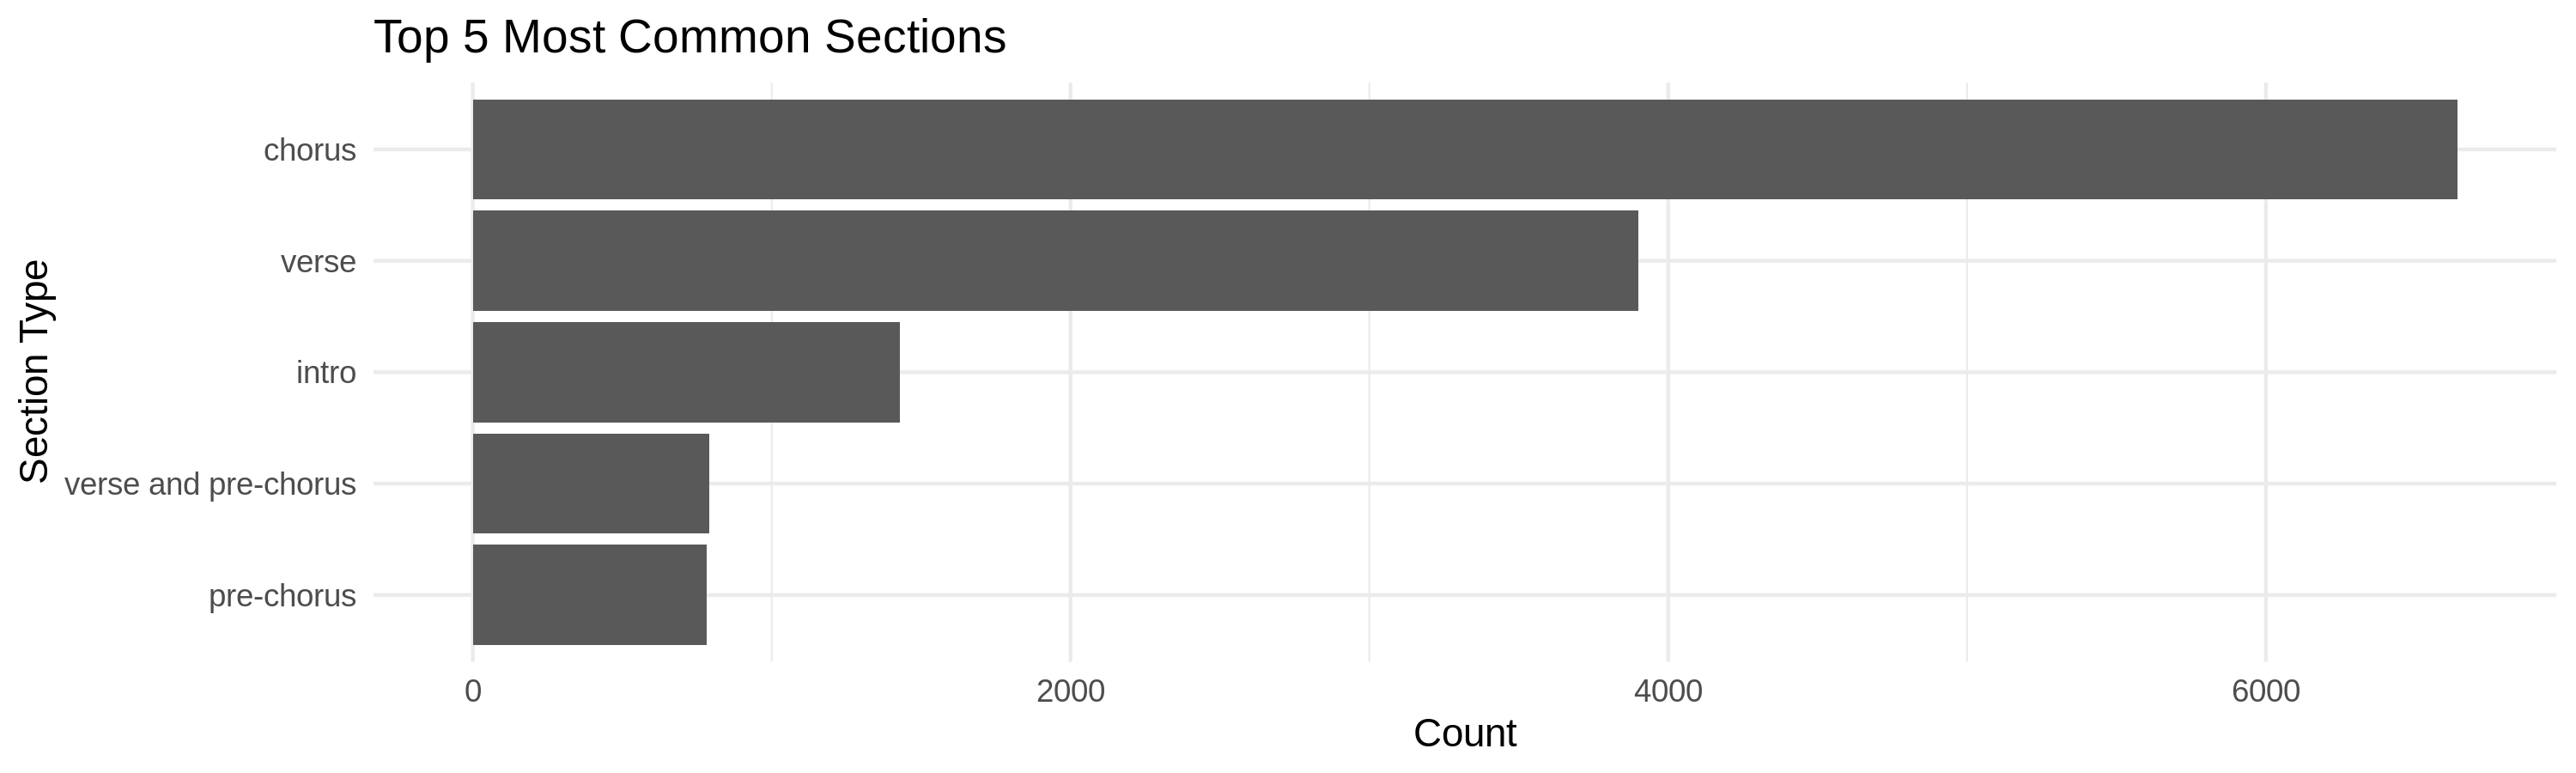

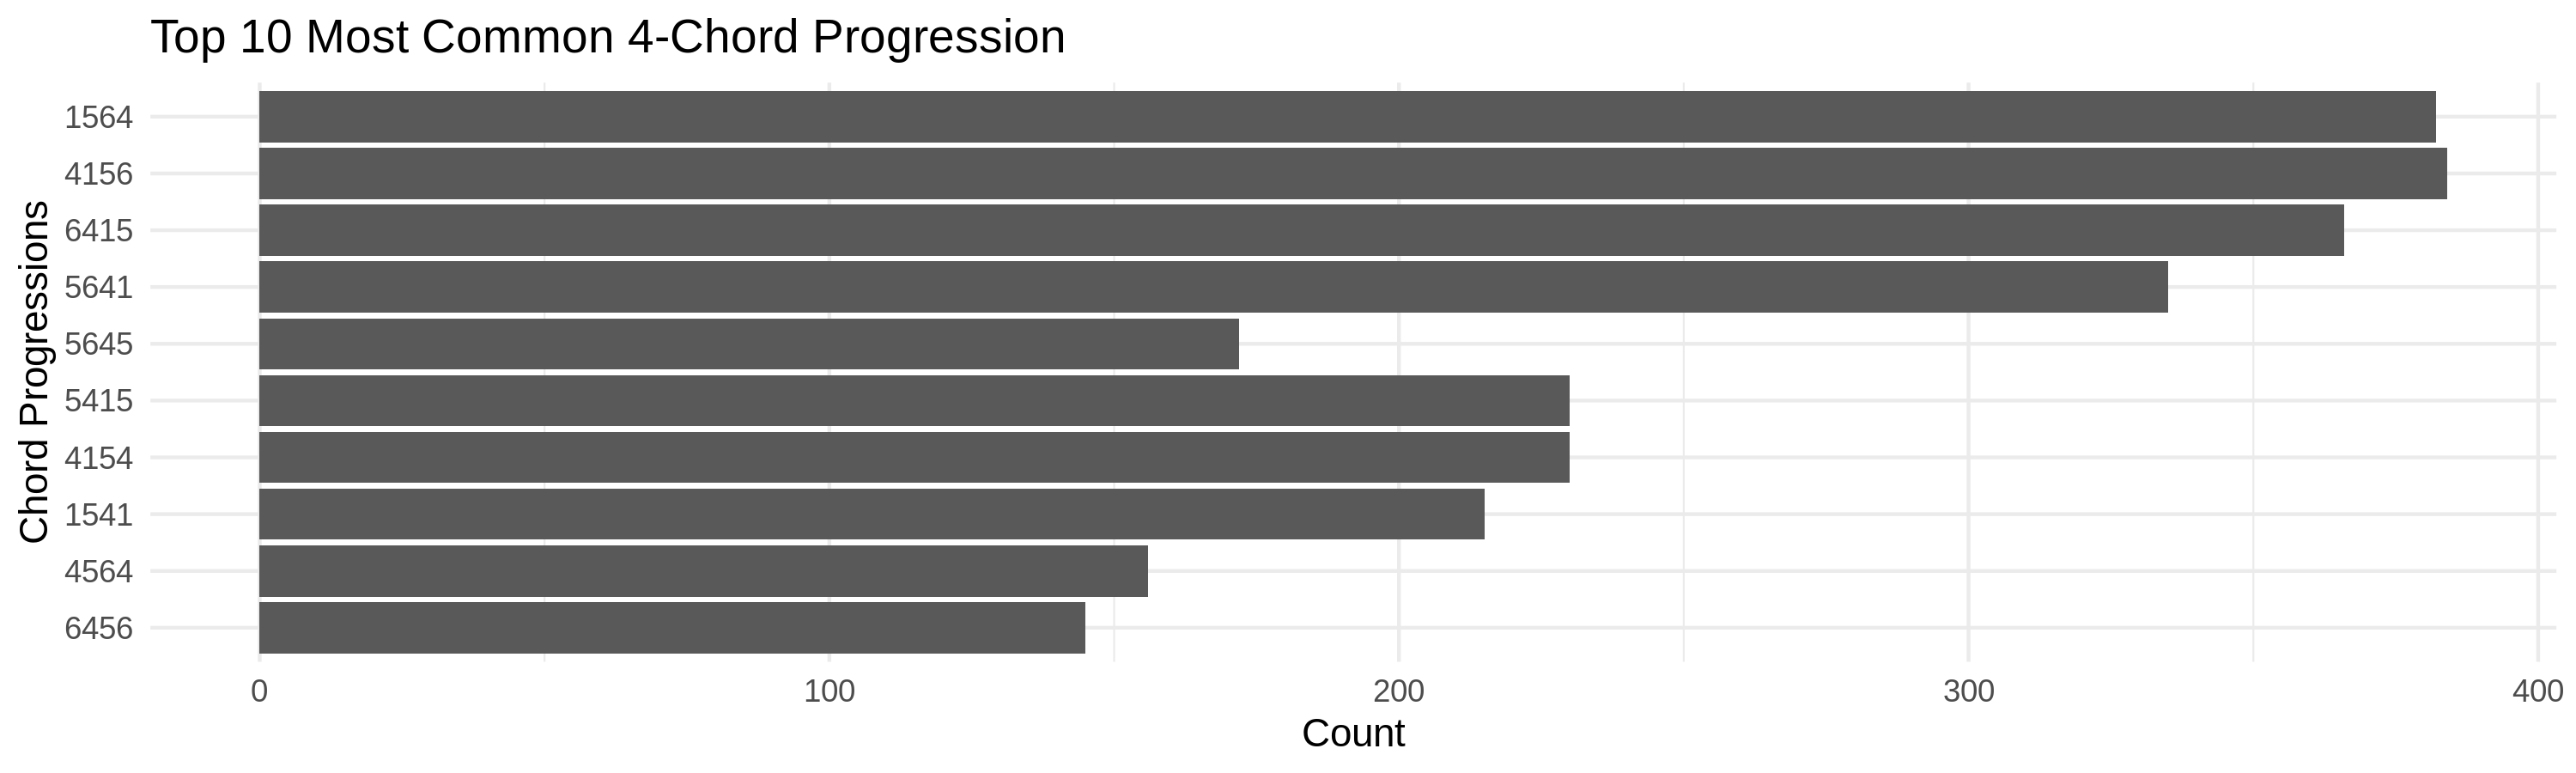

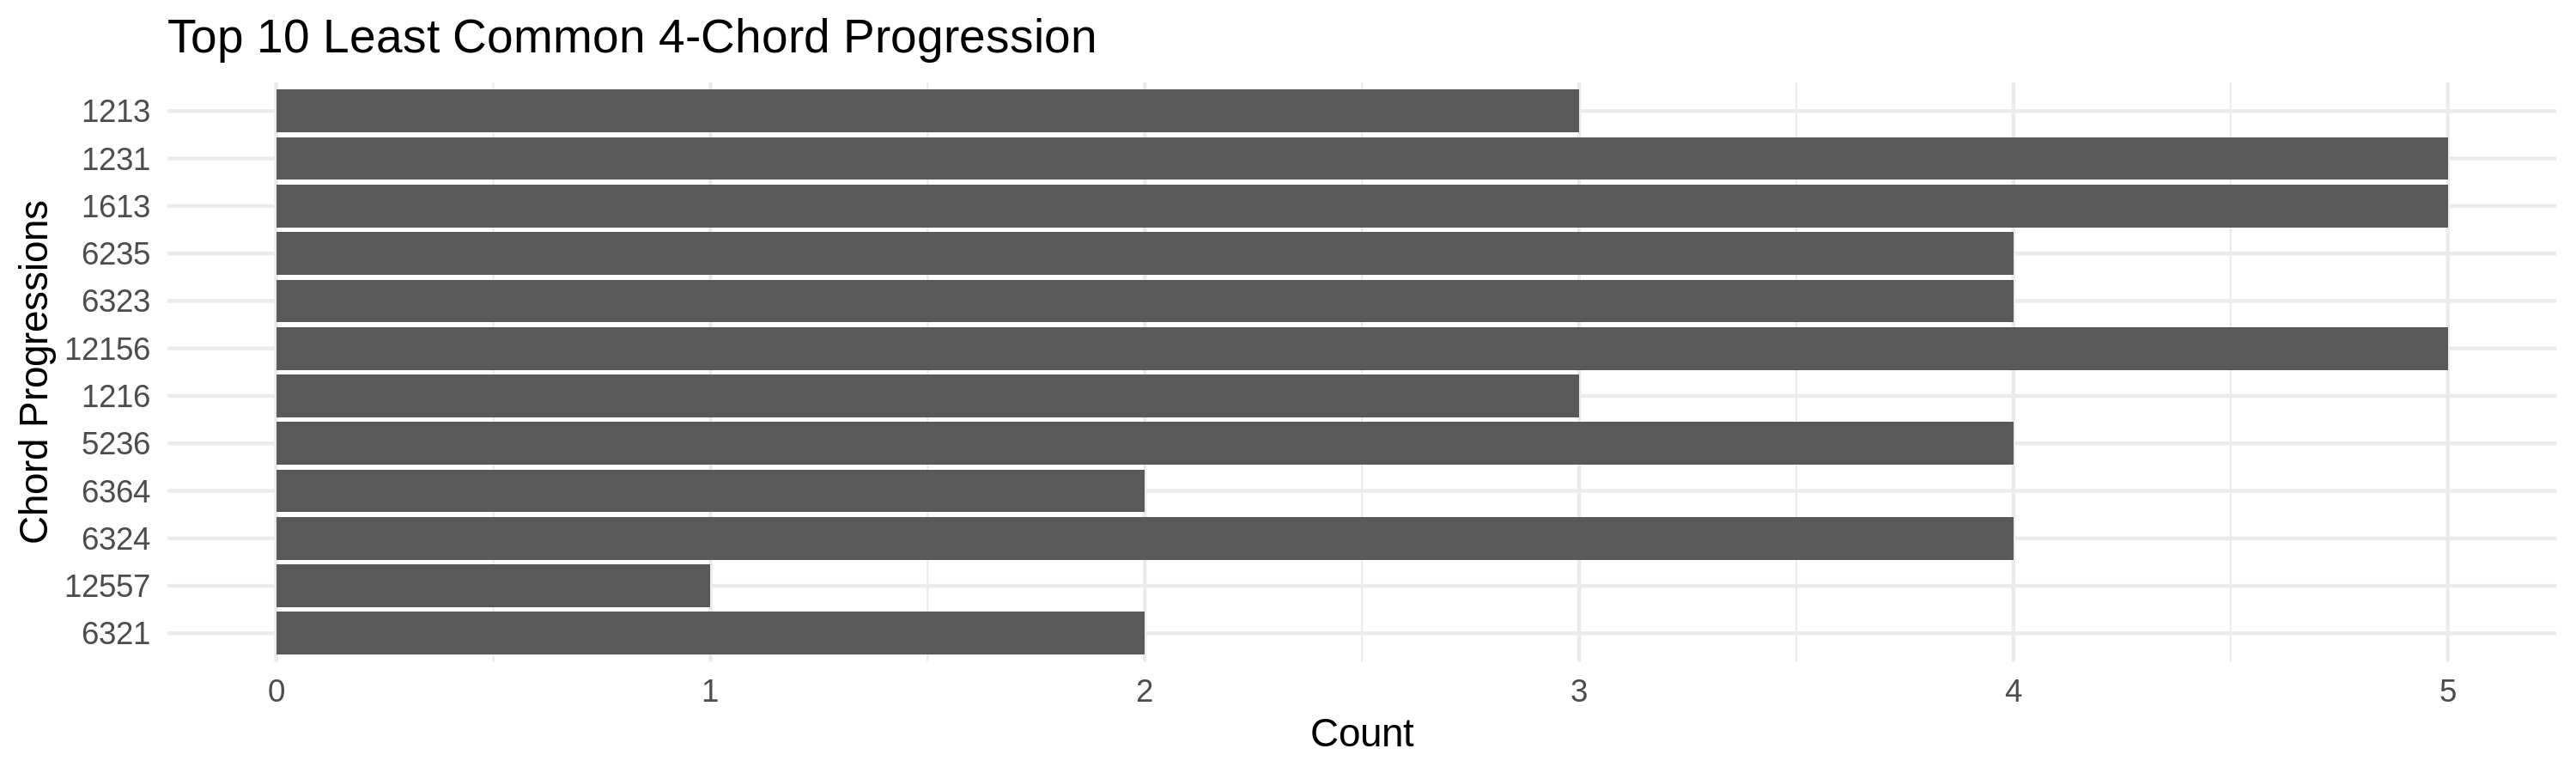

In [150]:
# Creating vectors to pull in later datasets
main_5_section = chord_p %>%
    group_by(section) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    slice_max(n, n = 5) %>%
    pull(section) 

main_10_cp = chord_p %>%
    group_by(cp) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    slice_max(n, n = 10) %>%
    pull(cp)

min_10_cp = chord_p %>%
    group_by(cp) %>%
    summarize(n = n()) %>%
    arrange(desc(n)) %>%
    slice_min(n, n = 10) %>%
    pull(cp)

# 5 most popular sections that are 4 chords
main_5_section2 = chord_p %>%
    filter(section %in% main_5_section) %>%
    mutate(section2 = section %>% fct_infreq() %>% fct_rev())

# 10 most popular chord progression
main_10_cp2 = chord_p %>%
    filter(cp %in% main_10_cp) %>%
    mutate(cp_char = as.character(cp) %>% fct_infreq() %>% fct_rev()) %>%
    na.omit(danceability) %>%
    group_by(cp_char) %>%
    mutate(mean_dance = mean(danceability), mean_energy = mean(energy), mean_tempo = mean(tempo), mean_dur = mean(duration_ms) / 6000, group = "Most Popular")
    

# 10 least popular chord progressions
min_10_cp2 = chord_p %>%
    filter(cp %in% min_10_cp) %>%
    mutate(cp_char = as.character(cp) %>% fct_infreq() %>% fct_rev()) %>%
    na.omit(danceability) %>%
    group_by(cp_char) %>%
    mutate(mean_dance = mean(danceability), mean_energy = mean(energy), mean_tempo = mean(tempo), mean_dur = mean(duration_ms) / 6000, group = "Least Popular")
    
     
# Top 5 most common sections that have 4 chords
p = ggplot(main_5_section2, aes(y = section2))
p = p + geom_bar()
p = p + labs(title = "Top 5 Most Common Sections", x = 'Count', y = 'Section Type')
p = p + theme_minimal()
p

# Top 10 most common 4 chord progressions
p1 = ggplot(main_10_cp2, aes(y = cp_char)) 
p1 = p1 + geom_bar()
p1 = p1 + labs(title = 'Top 10 Most Common 4-Chord Progression', x = 'Count', y = 'Chord Progressions')
p1 = p1 + theme_minimal()
p1

# Top 10 least common 4 chord progressions
p1_ = ggplot(min_10_cp2, aes(y = cp_char)) 
p1_ = p1_ + geom_bar()
p1_ = p1_ + labs(title = 'Top 10 Least Common 4-Chord Progression', x = 'Count', y = 'Chord Progressions')
p1_ = p1_ + theme_minimal()
p1_

It seems that among sections that have 4 chords, the chorus is the most popular section followed by the verse, intro, verse and pre-chorus, and pre-chorus. The top 3 most popular chord progression among songs with 4 chords seems to be 1564, 4156, and 6415.

However, do the most popular chord progression share common characterisitcs with each other? How do they compare with the least common chord progressions. Below are tables comparing mean danceability, energy, tempo, and duration of the top 10 most popular chord progressions and the top 10 least popular chord progressions:

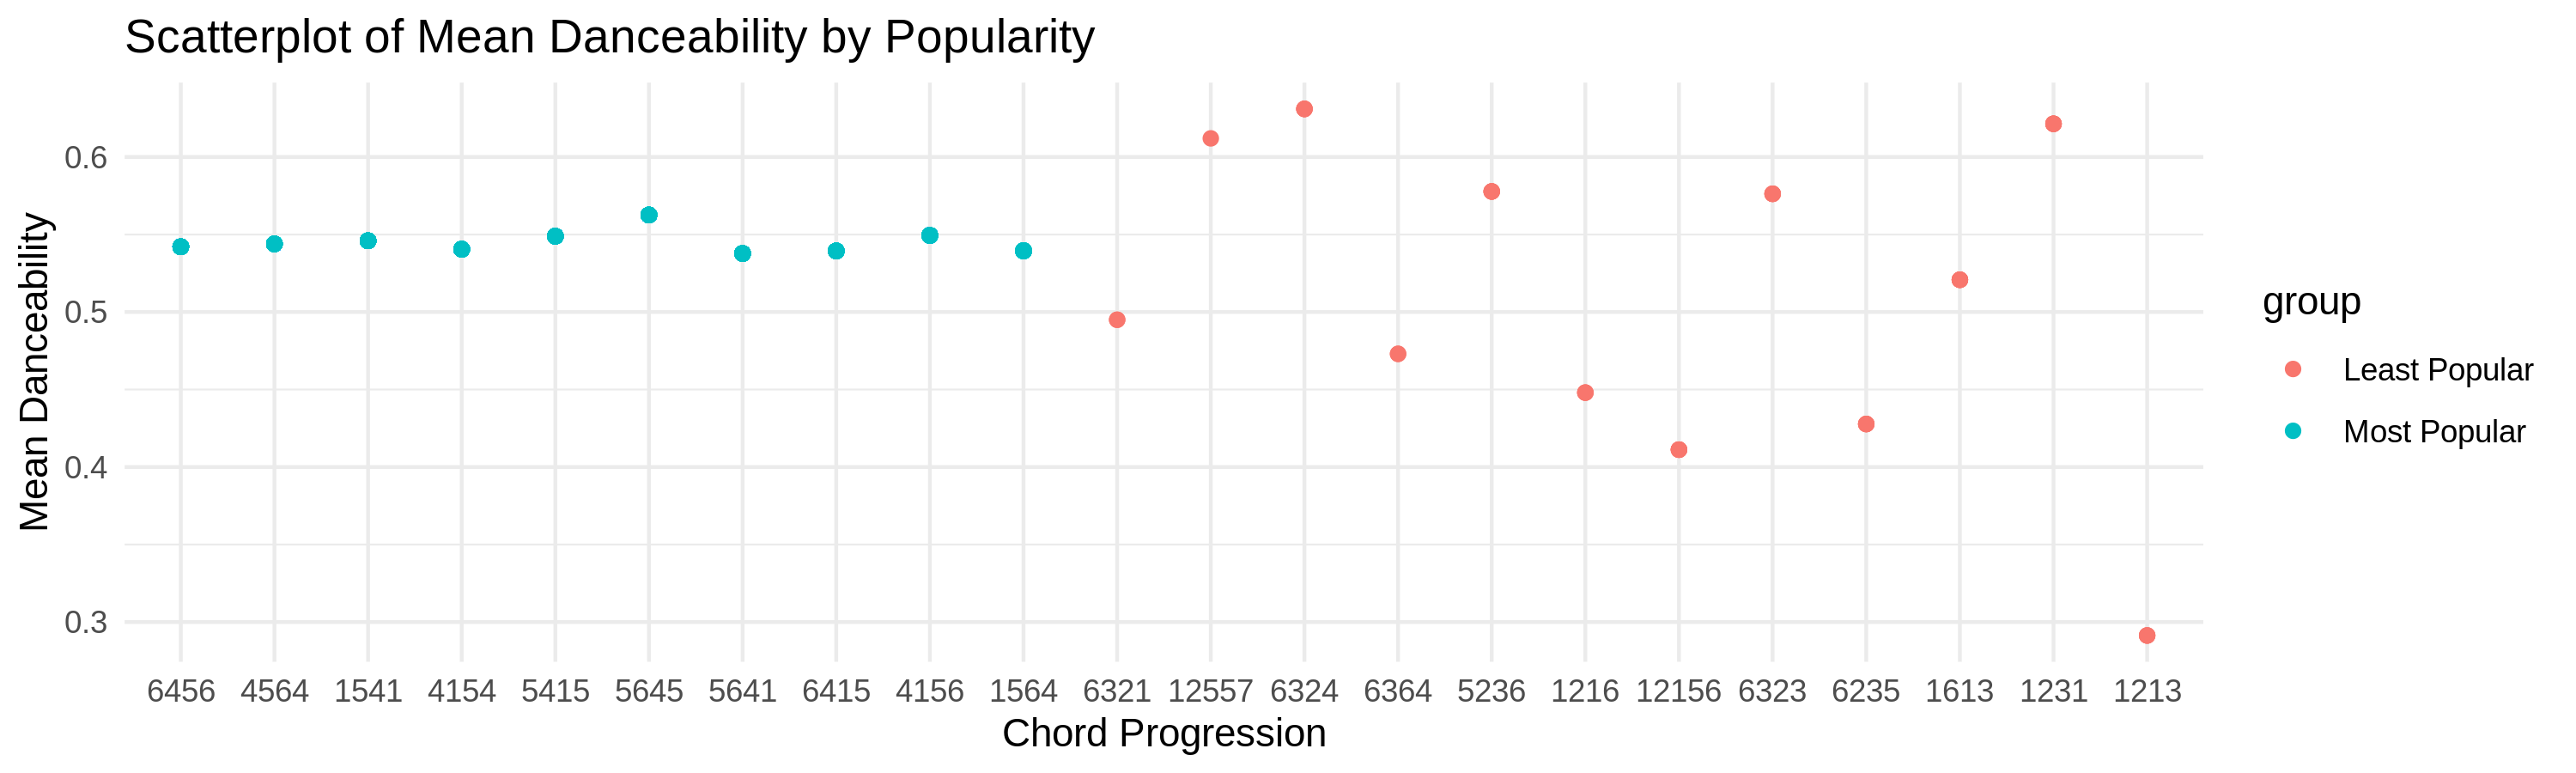

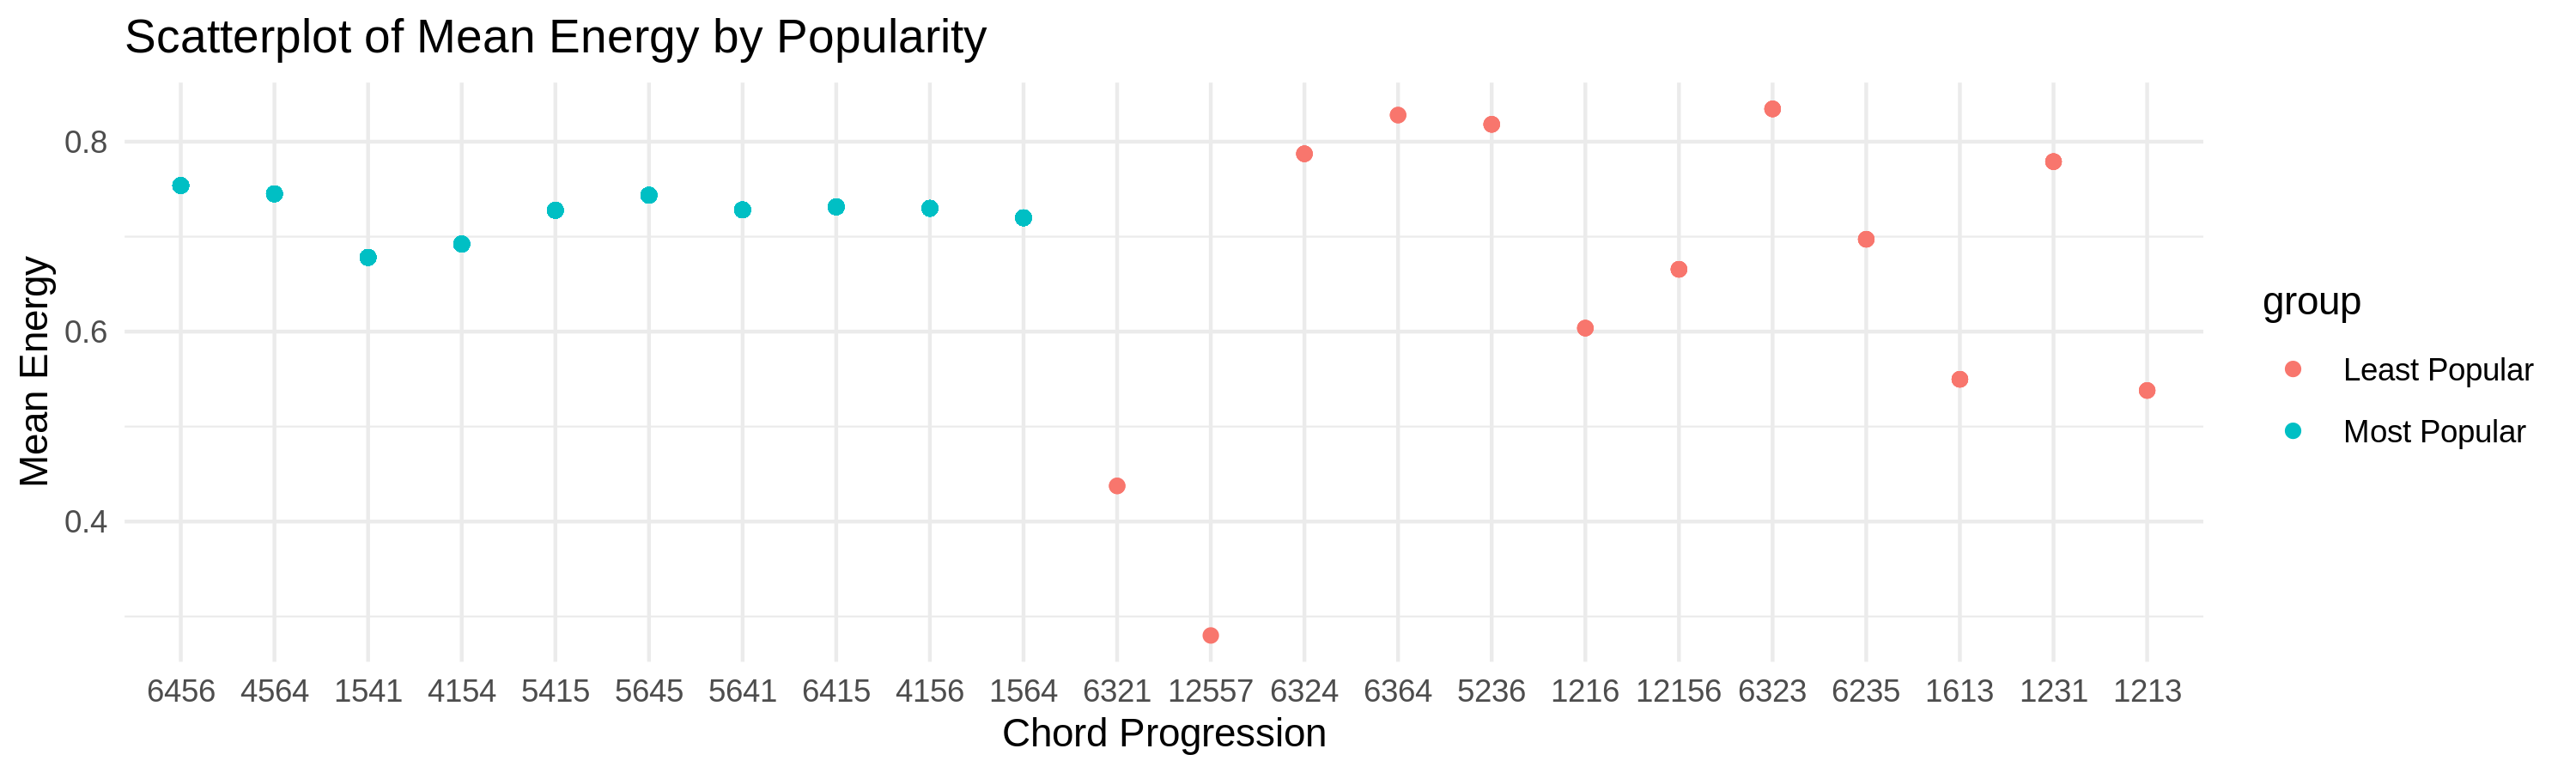

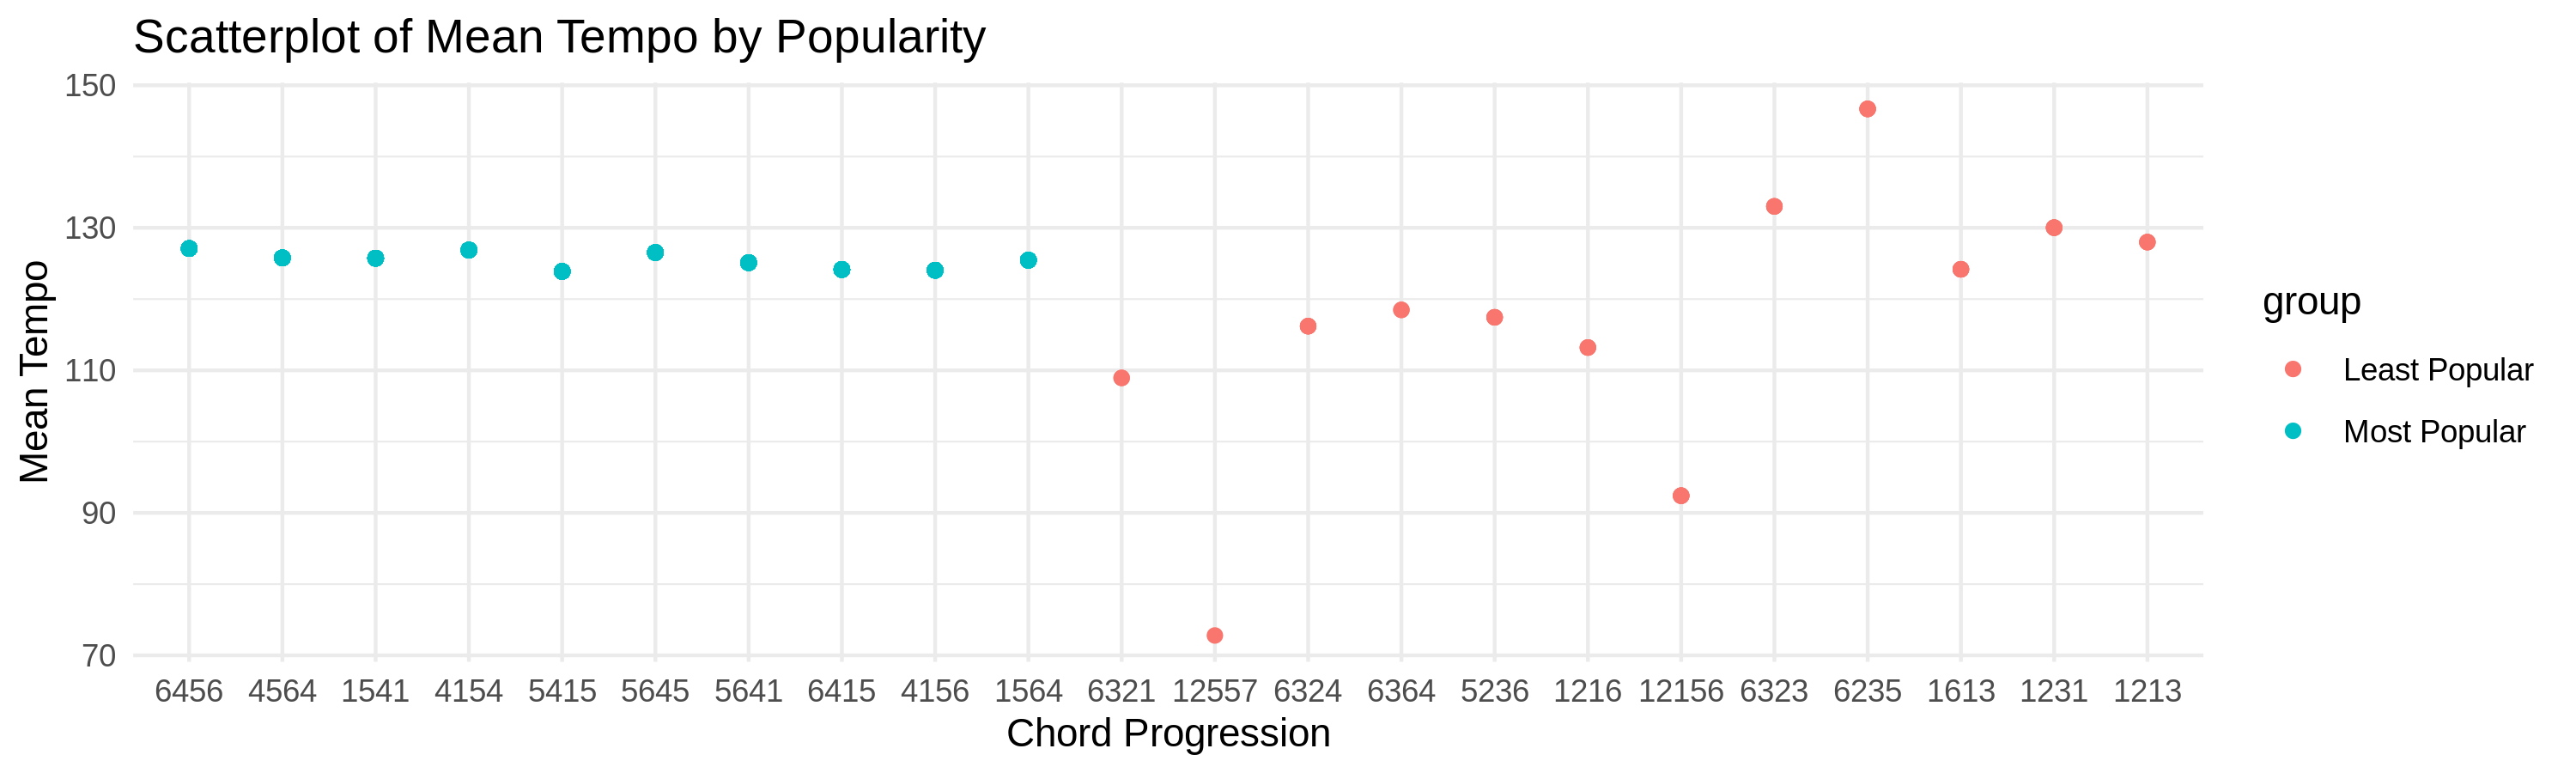

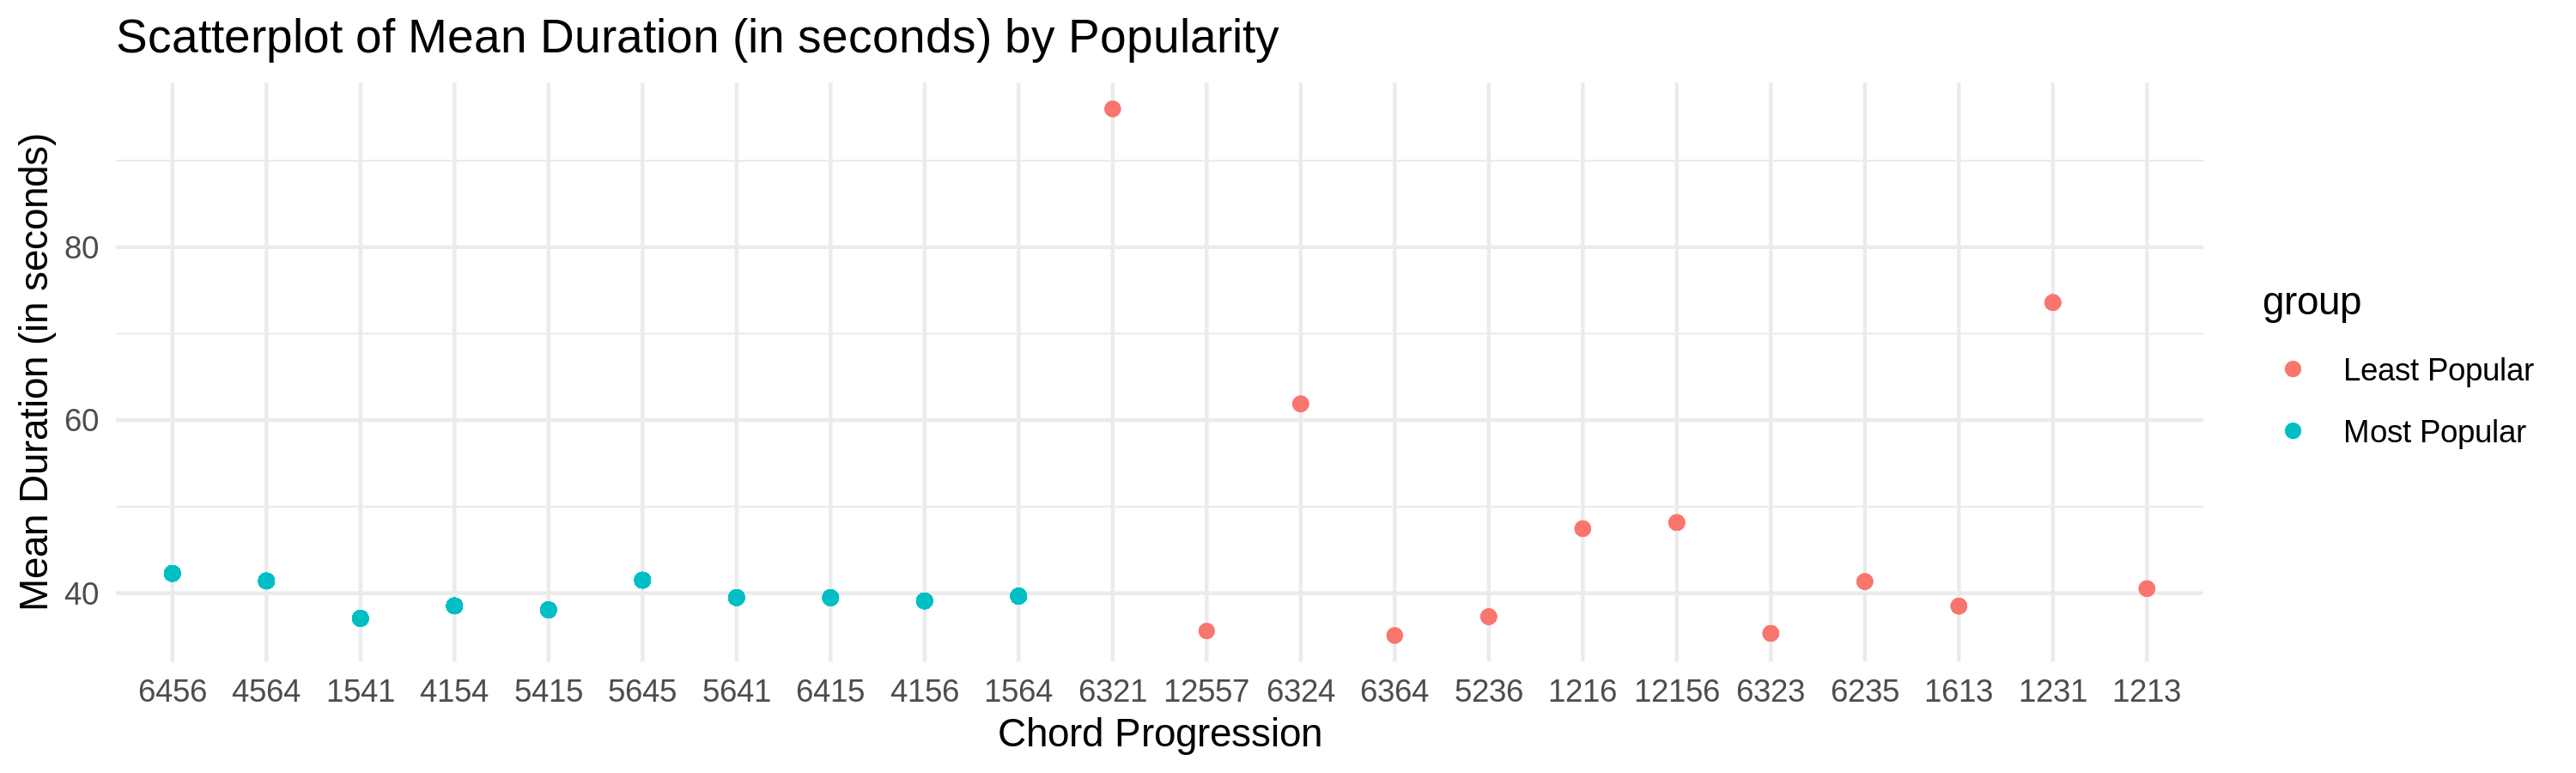

In [153]:
options(repr.plot.height = 3, repr.plot.width = 10, repr.plot.res = 300)
# Combining least and most popular datasets
combined = rbind(main_10_cp2, min_10_cp2)

# Scatterplot of danceability
p2 = ggplot(combined, aes(x = cp_char, y = mean_dance, color = group))
p2 = p2 + geom_point()
p2 = p2 + labs(title = 'Scatterplot of Mean Danceability by Popularity', x = 'Chord Progression', y = 'Mean Danceability')
p2 = p2 + theme_minimal()
p2 

# Scatterplot of energy
p3 = ggplot(combined, aes(x = cp_char, y = mean_energy, color = group))
p3 = p3 + geom_point()
p3 = p3 + labs(title = 'Scatterplot of Mean Energy by Popularity', x = 'Chord Progression', y = 'Mean Energy')
p3 = p3 + theme_minimal()
p3 

# Scatterplot of Tempo
p4 = ggplot(combined, aes(x = cp_char, y = mean_tempo, color = group))
p4 = p4 + geom_point()
p4 = p4 + labs(title = 'Scatterplot of Mean Tempo by Popularity', x = 'Chord Progression', y = 'Mean Tempo')
p4 = p4 + theme_minimal()
p4 

# Scatterplot of Duration
p5 = ggplot(combined, aes(x = cp_char, y = mean_dur, color = group))
p5 = p5 + geom_point()
p5 = p5 + labs(title = 'Scatterplot of Mean Duration (in seconds) by Popularity', x = 'Chord Progression', y = 'Mean Duration (in seconds)')
p5 = p5 + theme_minimal()
p5 

It seems that the most popular chord progressions have relatively similar danceability, energy, tempo, and duration values of .55, .75, 130, and 40, respectively. The least popular chord progressions seem to have higher variance in every category when compared to the most popular chord progressions, showing that there is more variety in less popular songs.